In [1]:
#%% DANE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as mgs
import matplotlib.ticker as mtc
import os
#os.chdir(os.path.dirname(__file__))


def f(x):
    return np.exp(-x) * np.cos(2*np.pi*x)+np.random.rand(len(x))/10
x = np.arange(0,5,0.03)
y = f(x)

# standardowy wykres i jego najważniejsze elementy

Text(0.5, 0.98, 'Main Title')

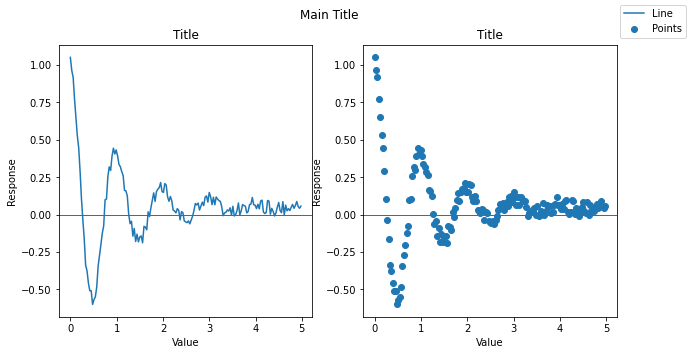

In [3]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.plot(x,y,label="Line")
ax1.set_xlabel("Value")
ax1.set_ylabel("Response")
ax1.set_title("Title")
ax1.axhline(0,lw=1,zorder=-1)
#ax1.legend()

ax2.scatter(x,y,label="Points")
ax2.set_xlabel("Value")
ax2.set_ylabel("Response")
ax2.set_title("Title")
ax2.axhline(0,lw=1,zorder=-1)
#ax2.legend()
fig.legend()
fig.suptitle("Main Title")

# Limits and marings

- Limits: pozwala sterować zasięgiem osi w w przestrzeni danych (zasięg danych)
- Margins: pozwala określać padding osi wykresu od danych w przestrzeni axes (0,1)

(0.0, 5.0)

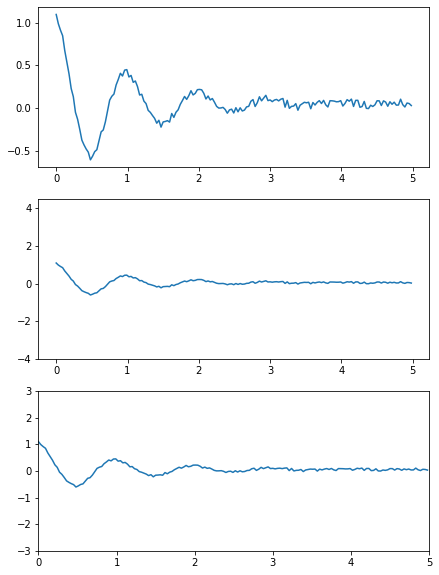

In [4]:
#%% LMITS i MARGINS

fig, axes = plt.subplots(nrows=3,figsize=(7,10))

axes[0].plot(x,y)

axes[1].plot(x,y)
axes[1].margins(0.05, 2) # zoom w y, padding 0.05 domyślne, czyli 5% zasięgu osi

axes[2].plot(x,y)
axes[2].set_ylim(-3,3) # zoom w y, 0.05 domyślne
axes[2].set_xlim(0,5) # zoom w y, 0.05 domyślne

# Transformacje i przestrzenie wartości

https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html

Transformacje:

- data - używa wartości danych dla wymiarów x i y (ax.transData)
- axes - używa wartości jednostkowych wykresu (ax.transAxes)
- display - używa koordynatów okna (None)

Transformacje używa się do definiowania, w jakich jednostkach określamy położenie obiektu. Elementy dodawane do wykresu z reguły posiadają domyślną transformację (nie zawsze to samo)

(<matplotlib.patches.Rectangle at 0x7f9430546700>,
 (<matplotlib.patches.ConnectionPatch at 0x7f943063c910>,
  <matplotlib.patches.ConnectionPatch at 0x7f943063c2e0>))

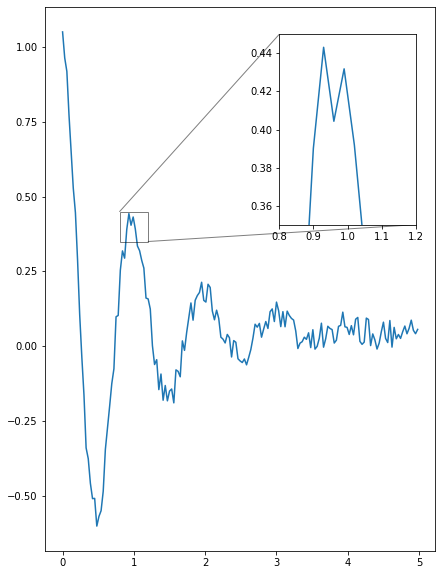

In [11]:
fig,ax = plt.subplots(figsize=(7,10))
ax.plot(x,y)
zoom_ax = ax.inset_axes([0.6, 0.6, 0.35, 0.35]) # wymiary axes w wartościach jednostkowych transform=ax.transAxes
#zoom_ax = ax.inset_axes([3,0.4,2,0.4],transform=ax.transData) # wymiary axes w wartościach danych"
zoom_ax.plot(x,y)
zoom_ax.set_xlim(0.8,1.2)
zoom_ax.set_ylim(0.35,0.45)

ax.indicate_inset_zoom(zoom_ax, edgecolor="black")

In [14]:
# czym jest transformacja
print(ax.transAxes.transform((0.01,0.1)))

[ 66.906 144.36 ]


# Linie, znaczniki i linie siatki

Poza formatowaniem, można definiować położenie znaczników  (ticker) oraz ich etykiety. 

Siatki są ściśle powiązane ze znacznikami. Jest kilka sposobów umieszczania znaczników

https://matplotlib.org/stable/api/ticker_api.html#

Najważniejsze to:

- Multiple
- Fixed
- Null (bez znaczników)


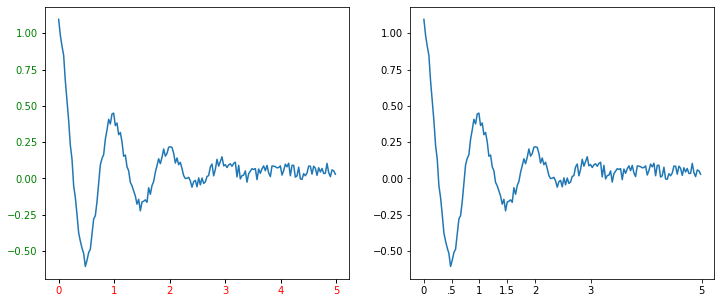

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.plot(x,y)
ax1.tick_params(axis="x",labelcolor='r', labelsize='medium', width=1)
ax1.tick_params(axis="y",labelcolor='g', labelsize='medium', width=1) # domyślne axis="both"

ax2.plot(x,y)
ax2.set_xticks([0,0.5,1,1.5,2,3,5],labels=["0",".5","1","1.5","2","3","5"])


Dodawanie siatki do wykresu

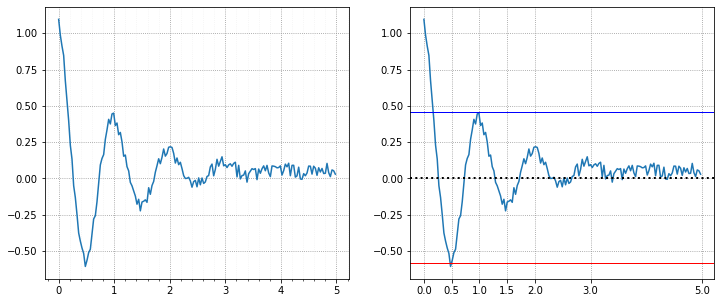

In [8]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.plot(x,y)
ax1.xaxis.set_major_locator(mtc.MultipleLocator(1)) # locators
ax1.xaxis.set_minor_locator(mtc.MultipleLocator(0.2))
ax1.grid(ls=":",color=".55",which="major")
ax1.grid(ls=":",color="0.95",which="minor")

ax2.plot(x,y)
ax2.xaxis.set_major_locator(mtc.FixedLocator([0,0.5,1,1.5,2,3,5])) # locators
ax2.grid(ls=":",color=".55",which="major")
ax2.axhline(-.58,color='red',lw=1)
ax2.axhline(0,color='black',lw=2, ls=":")
ax2.axhline(.46,color='blue',lw=1)

# Więcej osi

Sytuacje, gdy wykres potrzebuje więcej osi:

- dodatkowe osie danych
- osie z alternatywnymi wartościami

Za dodatkowe osie odpowiada metoda twinx(). Takie osie są od siebie niezależne w przestrzeni danych, ale kompatybilnew przestrzeni wykresu


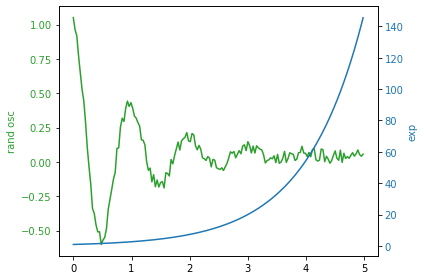

In [16]:
z1 = np.exp(x)


fig, ax1 = plt.subplots()

color = 'tab:green'
p = ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('rand osc', color=color) 
ax2 = ax1.twinx()  # tworzenie alternatywnej osi

color = 'tab:blue'
ax2.set_ylabel('exp', color=color) 
ax2.plot(x, z1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

Tą samą metodą można dodać trzecią oś. Trzeba ją ręcznie przesunąć.

Jako dodatek sposób przekazywania parametrów znaczników

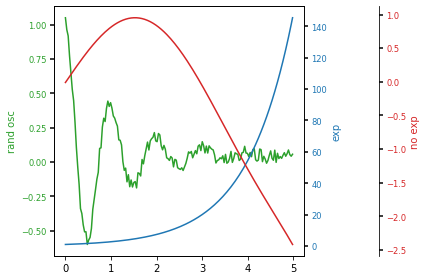

In [17]:
z2 = -np.exp(x)/100+np.sin(x)

fig, ax1 = plt.subplots()

tparam = dict(size=4, width=1.5,labelsize='small') # parametry znaczników defniować osobno

color = 'tab:green'
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color,** tparam)
ax1.set_ylabel('rand osc', color=color) 

ax2 = ax1.twinx()  # tworzenie alternatywnej osi
ax3 = ax1.twinx()  # tworzenie drugiej alternatywnej osi

ax3.spines.right.set_position(("axes", 1.3)) # przesunięcie osi w przestrzeni wykresu 

color = 'tab:blue'
ax2.set_ylabel('exp', color=color) 
ax2.plot(x, z1, color=color)
ax2.tick_params(axis='y', labelcolor=color,** tparam)
fig.tight_layout()


color = 'tab:red'
ax3.set_ylabel('no exp', color=color) 
ax3.plot(x, z2, color=color)
ax3.tick_params(axis='y', labelcolor=color,** tparam)
fig.tight_layout()

Alternatywne osie, to sytuacja, gdzie dane pokazywane są w innych jednostkach lub innych zakresach. 

**UWAGA**: nie da się dodać grid dla secondary axis. Trzeba odwrócić osie

Text(0.5, 0, 'angle [rad]')

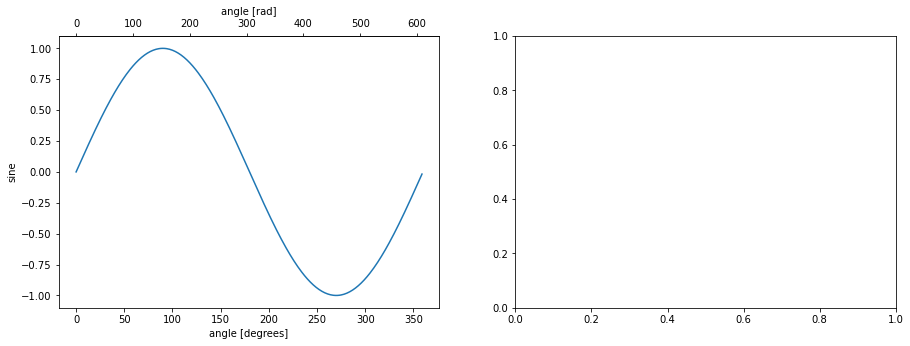

In [23]:
sx = np.arange(0,360)
sy = np.sin(np.radians(sx))

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
ax1.plot(sx, sy)
ax1.set_xlabel('angle [degrees]')
ax1.set_ylabel('sine')


def to_miles(x):
    return x*1.696
    
def to_kms(x):
    return x/1.696

secax1 = ax1.secondary_xaxis('top', functions=(lambda x: x*1.696, lambda x: x/1.696)) # forward i reverse
secax1.set_xlabel('angle [rad]')

#ax2.plot(sx, sy)

#ax2.set_ylabel('sine')
#ax2.xaxis.set_major_locator(mtc.FixedLocator([0,30,60,120,180,360])) # locators
#ax2.grid(ls=":",color=".55",which="major") # nie da się umieścić grid sla secondary axis
#ax2.xaxis.tick_top()
#ax2.xaxis.set_label_position('top') 
#ax2.set_xlabel('kąty co 60')

#secax2 = ax2.secondary_xaxis('bottom') 
#secax2.set_xlabel('kąty co 50')


#secax2 = ax2.secondary_xaxis('top') 
#secax2.xaxis.set_major_locator(mtc.FixedLocator([0,30,60,120,180,360])) # locators
#secax2.grid(ls=":",color=".55",which="major") # nie da się umieścić grid sla secondary axis
#secax2.set_xlabel('lepsze jednostki')


# Dodanie legendy

Elementy legedy dodajemy wskazując rodzaj etykietowanej informacji. Lokalizacja legendy jest definiowana przez położenie oraz możliwości przemieszczania. Lokalizacja legendy może być definiowana w dowolnej przestrzeni. Punkt wspórzędnych jest również definiowany przez "loc"

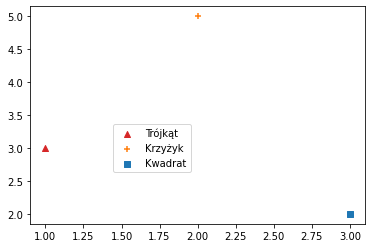

In [30]:

fig, ax = plt.subplots()
ax.scatter(1,3,c="C3",marker="^",label="Trójkąt")
ax.scatter(2,5,c="C1",marker="+",label="Krzyżyk")
ax.scatter(3,2,c="C0",marker="s",label="Kwadrat")
#ax.legend()
#ax.legend(loc='lower left')
ax.legend(loc='center', bbox_to_anchor=(1.7,3), bbox_transform=ax.transData) # zmieniać loc i pokazać jak działa

# Współdzielenie osi

Jeżeli share jest ustawiony w suplots automatycznie usuwane są etykiety znaczników

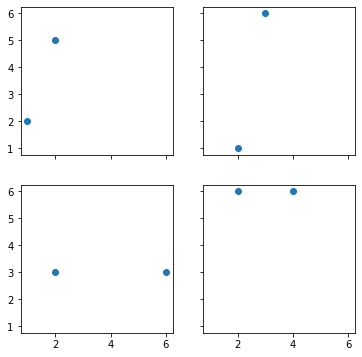

In [ ]:
#%% SHARE
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,6),sharex=True,sharey=True)
axes[0][0].scatter([1,2],[2,5])
axes[1][0].scatter([6,2],[3,3])
axes[0][1].scatter([3,2],[6,1])
axes[1][1].scatter([4,2],[6,6])


# Układy wykresów - Łaczenie podwykresów

Sposób bardzo podobny do rowspan i colspan w HTML. Siatkę wykresu trzeba rozumieć jako numpy.array i proces łączenia to proces definiowania zasięgów siatki. Dodatkowo: alternatywny sposób

**offtopic:** Wykres poniżej jest poglądowy. Przy pomocy pętli wykonałem 16 wykresów. Tablica osi została spłaszczona do 1 wymiarowej, product wyprodukował pary współrzędnych, które zostały naniesione metodą text(). fontdict to lista parametrów, którymi można formatować tekst.

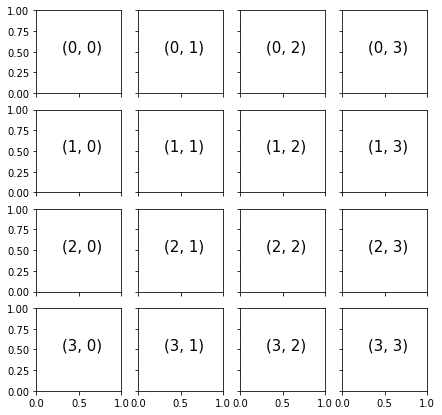

In [13]:
from itertools import product
fig,axes = plt.subplots(4,4,figsize=(7,7),sharex=True,sharey=True)
for ax, coords in zip(axes.flatten(),product(range(4),range(4))):
    ax.text(0.3,0.5,coords,fontdict={'fontsize':15})

add_subplot() to alternatywna metoda dodawania wierszy i kolumn. Zalecana jednie w przypadku łączenia


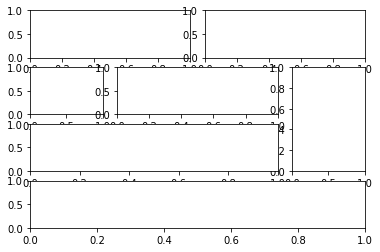

In [41]:
# wyświetlać linia po linii
fig = plt.figure()
gs = fig.add_gridspec(4,4)
ax1 = fig.add_subplot(gs[0,:2])
ax2 = fig.add_subplot(gs[0,2:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1:3]) # wszedzie zamiast 3 może być -1
ax5 = fig.add_subplot(gs[1:3,3]) # lub -1
ax6 = fig.add_subplot(gs[2,:3])
ax7 = fig.add_subplot(gs[3,:])

# Tworzenie siatki przez usuwanie wybranych axes

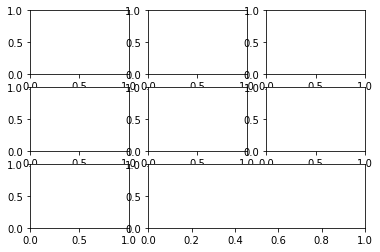

In [44]:
fig, axes = plt.subplots(3,3)
gs = axes[2, 1].get_gridspec()
axes[2,1].remove()
axes[2,2].remove() #usuwamy dwie
ax_jn = fig.add_subplot(gs[2,1:]) # dodajemy 1

# Zagnieżdzone siatki

Alternatywną formą tworzenia siatki jest zagnieżdzanie siatek w innych wykresach

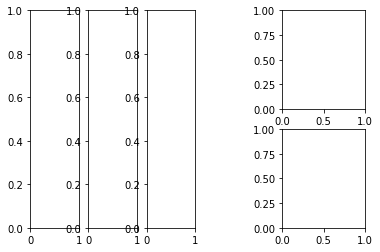

In [16]:
fig = plt.figure()
gs = fig.add_gridspec(1,2,width_ratios=(2, 1), wspace=0.7)

gs0 = gs[0].subgridspec(1,3)
ax00 = fig.add_subplot(gs0[0])
ax01 = fig.add_subplot(gs0[1],sharey=ax00)
ax02 = fig.add_subplot(gs0[2],sharey=ax00)

gs1 = gs[1].subgridspec(2,1)
ax10 = fig.add_subplot(gs1[0])
ax11 = fig.add_subplot(gs1[1])

# Korekta układu
Aby zapobiec nakładaniu się osi, można zdefiniować **layout**. Stosuje się najczęściej *tight* i *constrained*

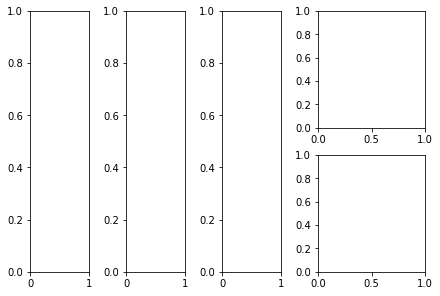

In [45]:
fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(1,2,width_ratios=(2, 1), wspace=1.5)

gs0 = gs[0].subgridspec(1,3)
ax00 = fig.add_subplot(gs0[0])
ax01 = fig.add_subplot(gs0[1],sharey=ax00)
ax02 = fig.add_subplot(gs0[2],sharey=ax00)

gs1 = gs[1].subgridspec(2,1)
ax10 = fig.add_subplot(gs1[0])
ax11 = fig.add_subplot(gs1[1])

# Dowolne rozmieszczenie wykresy

Można dowolnie rozmieszczać poleceniem add_axes, gdzie jako parametr podajemy zasięg wykresu. Domyślna transformacja to Figure, w wartościach jednostkowych. 

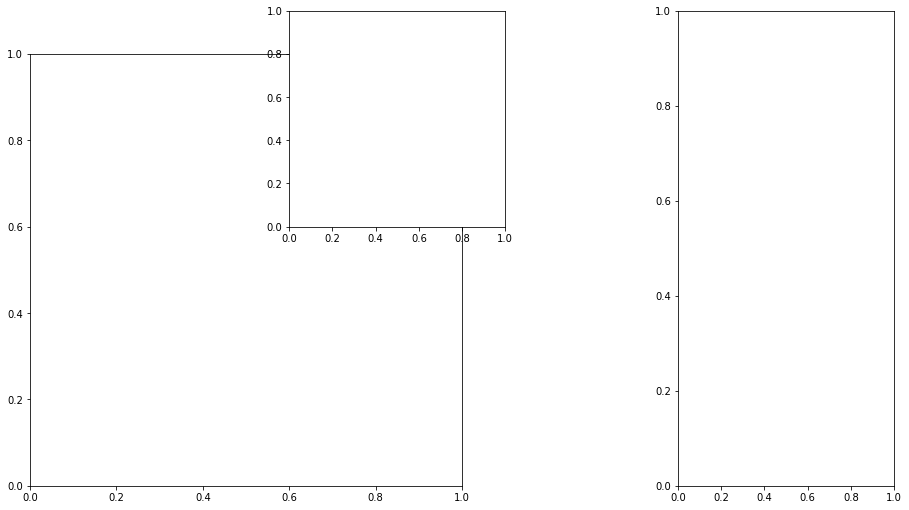

In [18]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_axes((1,0,1,1))
ax2 = fig.add_axes((1.6,0.6,0.5,0.5))
ax3 = fig.add_axes((2.5,0,0.5,1.1))

# Zagnieżdzenie wykresów

Możemy łączyć na jednej figurze osobne złożone wykresy poprzez zagnieżdzone figury.

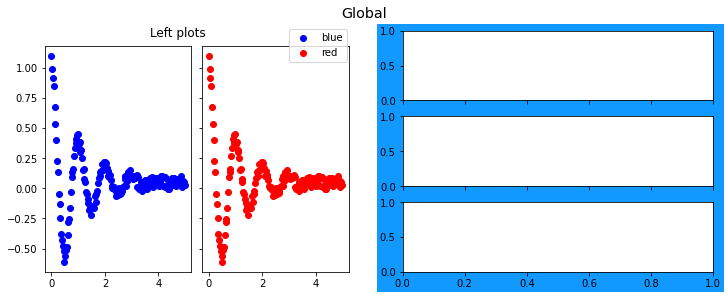

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(10, 4))
subfig1,subfig2 = fig.subfigures(1, 2, wspace=0.07)

axes1 = subfig1.subplots(1, 2, sharey=True)
axes2 = subfig2.subplots(3, 1, sharex=True)

axes1[0].scatter(x,y,label="blue",c='b')
axes1[1].scatter(x,y,label="red",c='r')

subfig1.suptitle('Left plots', fontsize='large')
fig.suptitle('Global', fontsize='x-large')
subfig1.legend(loc=1) # legenda przypisywana na poziomie subfig
subfig2.set_facecolor('#1199FF')

# Przykład margin plot

(array([ 3.,  8., 10., 21., 36., 11.,  6.,  1.,  1.,  0.,  2.,  1.]),
 array([-3.02369055, -2.28802498, -1.5523594 , -0.81669383, -0.08102825,
         0.65463732,  1.3903029 ,  2.12596847,  2.86163405,  3.59729962,
         4.3329652 ,  5.06863077,  5.80429635]),
 <BarContainer object of 12 artists>)

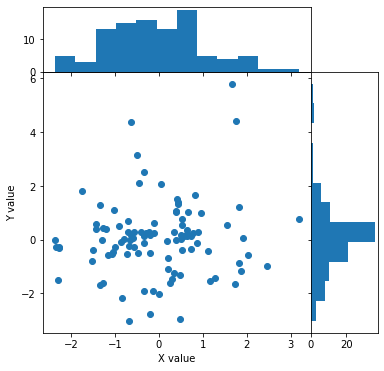

In [20]:
xp = np.random.normal(size=100)
yp = np.random.laplace(size=100)

fig = plt.figure(figsize=(6,6))  # equal
gs = fig.add_gridspec(2,2,width_ratios=(4, 1), height_ratios=(1, 4), wspace=0, hspace=0)
ax = fig.add_subplot(gs[1, 0])
ax.set_xlabel("X value")
ax.set_ylabel("Y value")
ax_x = fig.add_subplot(gs[0, 0], sharex=ax)
ax_y = fig.add_subplot(gs[1, 1], sharey=ax)

ax_x.tick_params(axis="x", labelbottom=False)
ax_y.tick_params(axis="y", labelleft=False)
ax.scatter(xp, yp)
ax_x.hist(xp, bins=12)
ax_y.hist(yp, bins=12, orientation='horizontal')

# Projekcje

Możemy tworzyć wykresy w systemie różnych projekcji. Projekcje definiujemy w momencie dodawania subplot lub axes.

In [46]:
x,y,z = np.random.rand(3,100)

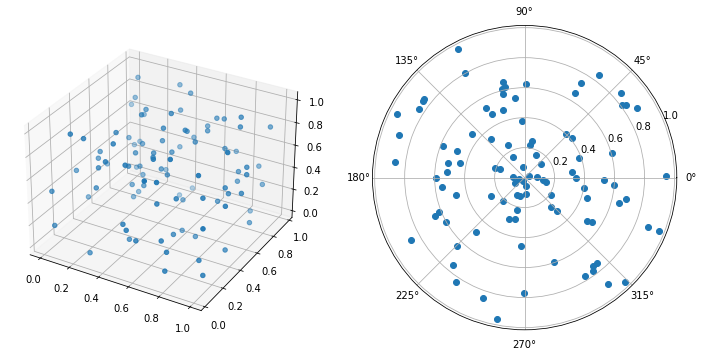

In [48]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121,projection="3d")
ax2 = fig.add_subplot(122,projection="polar")
ax1.scatter(x,y,z)
ax2.scatter(x*6.282,y) # X w radianach 

# Przykład wizualizacja 3 zmiennych

Text(0.5, 0.98, 'Wykres 3 zmiennych z 3D')

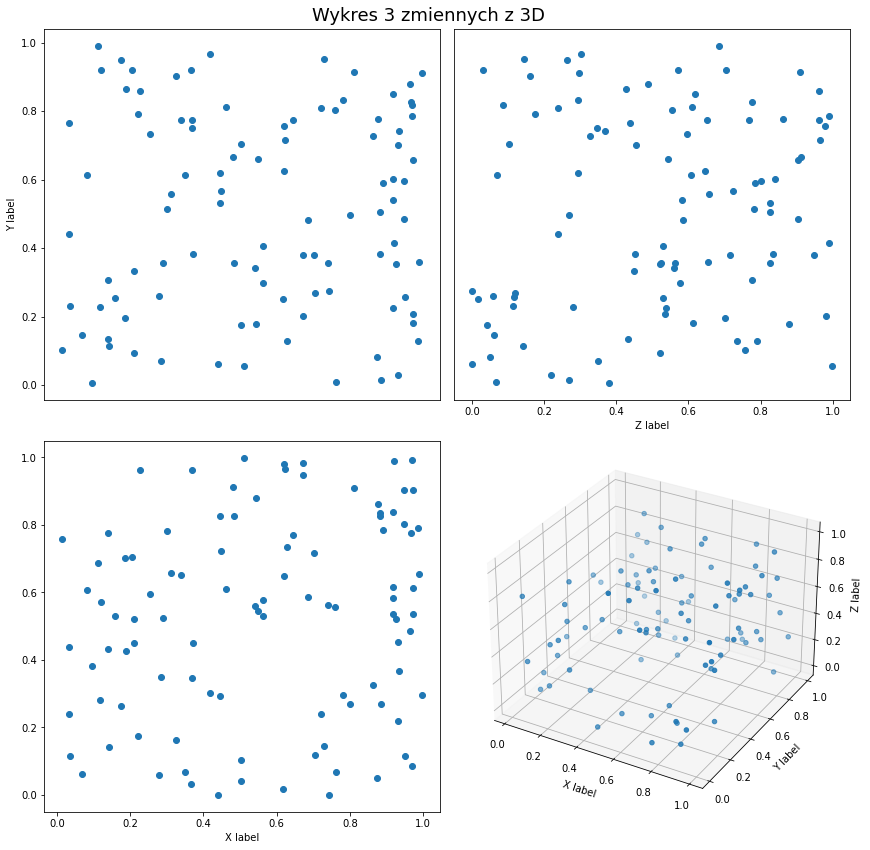

In [23]:
fig = plt.figure(figsize=(12,12),layout="tight")
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222,sharey=ax1)
ax3 = fig.add_subplot(223,sharex=ax1)
ax4 = fig.add_subplot(224,projection="3d")

ax1.scatter(x,y)
ax2.scatter(z,y)
ax3.scatter(x,z)
ax4.scatter(x,y,z)
ax1.set_ylabel("Y label")
ax3.set_xlabel("X label")
ax2.set_xlabel("Z label")

ax1.axes.get_xaxis().set_visible(False) # osie trzeba usuwać ręcznie
ax2.axes.get_yaxis().set_visible(False)

ax4.set_ylabel("Y label")
ax4.set_zlabel("Z label")
ax4.set_xlabel("X label")

fig.suptitle("Wykres 3 zmiennych z 3D",fontsize=18)